In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import copy

(240, 2) (300, 1)


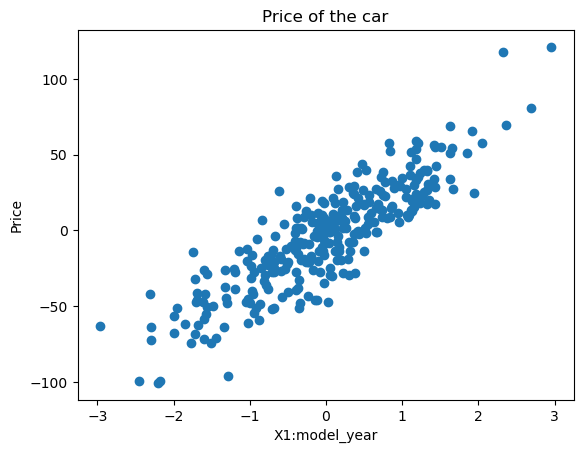

In [180]:
X,y =make_regression(n_samples=300,n_features=1,noise=18.0) #For training purpose , we create a fake datasets

# We Normalize 
X = (X - np.mean(X,axis=0)) / np.std(X,axis=0)

# Reshape y for avoiding broadcast error
y = y.reshape((-1,1))

# Add biais column
ones = np.ones((X.shape[0],1))
X = np.concatenate(
    (X,ones),
    axis=1
)

#Splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Transform data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

#show data
plt.scatter(X[:,0],y)

print(X_train.shape,y.shape)
#We assume our fake datasets represent the price of a Car regarding to his model_year,millage
plt.title('Price of the car')
plt.xlabel('X1:model_year')
plt.ylabel('Price')
plt.show() # As sooon as we work with jupiter,this line is useless. With Spider, it is very important

# Initialize the weight
θ is a column vector which represents weights W and biais b,like their union.
We first initialize the θ column vector with zeros

In [170]:
θ = np.zeros((X_train.shape[1], 1))  

m = y.shape[0] #We get the number of samples
print(θ.shape)

(2, 1)


# We set our hypothesis model
The linear model we used is a simple linear function:
 $$
    f_{θ}(X) =  Xθ
    $$

We prefered to work with matrix,but keep in mind ,it is just a <h1 style='color:blue'>Simple linear function</h1> 


In [171]:
def model(X,θ):
    return X.dot(θ)

# Loss function
Loss function allows us to evaluate or quantify the error between our real value and our model prediction. We will use MEAN SQUARE ERROR which is the following:
 $$Loss(\mathbf{θ}) = \frac{1}{2m} \sum\limits_{i = 1}^{m} (model{(X,θ)} - y)^2$$
We then add the regularization part

In [172]:
def lossFunction(X,y,θ,alpha=0.1):
    #use θ as a local parameter
    
    cost = (model(X,θ)-y) **2  # model(X,W) represents our prediction. y_hat = model(X,W) So we just did y_hat -y = model(X,W) - y
    reg = alpha*np.sum(θ*θ)
    total_cost = (1 /( 2 * m)) * np.sum(cost+reg)
    return total_cost

# Gradient
Formula of the gradient:
$$
\frac{\partial J(θ)}{\partial θ}  = \frac{1}{m} \sum\limits_{i = 1}^{m} X.T(model(X,θ) - y)) 
$$
We then regularize

In [173]:
def gradient(X,y,θ,alpha=0.1):
    residu = model(X,θ) - y
    reg = alpha*np.sum(θ)
    return (1 / m) * ( X.T.dot(residu) + reg) #Don't forget to transpose


# Training and updating
Now we can train our hypothesis model and optimize weights and biais for getting optimal parameters

In [174]:
def gradient_descent(X_train,y_train,θ_in,epochs=400,lr=0.01):
    
    loss_history = np.zeros(epochs)
    #Never work directly with the parameter θ.We must first and foremost handle the copy. In fact,we must avoid to modify 
    #its value inside the function
    θ = copy.deepcopy(θ_in)
    for epoch in range(epochs):
        dθ = gradient(X_train,y_train,θ)
        θ = θ - lr * dθ
        loss_history[epoch] = lossFunction(X_train,y_train,θ)
        
        if epoch% np.ceil(epochs/10) == 0:
            print(lossFunction(X_train,y_train,θ))
            print(f"Iteration {epoch:4}: Cost {float(loss_history[-1]):8.2f}   ")
            
    return θ,loss_history
    
θ_optim,loss_history = gradient_descent(X_train,y_train,θ)

print('Optim value of the weight',θ_optim)




330.9101228732459
Iteration    0: Cost     0.00   
191.2597970257598
Iteration   40: Cost     0.00   
121.12576360686136
Iteration   80: Cost     0.00   
86.63777107674343
Iteration  120: Cost     0.00   
70.23584585480283
Iteration  160: Cost     0.00   
62.867481081903684
Iteration  200: Cost     0.00   
59.90375616329708
Iteration  240: Cost     0.00   
59.00568510662066
Iteration  280: Cost     0.00   
59.01223867336497
Iteration  320: Cost     0.00   
59.362840437385024
Iteration  360: Cost     0.00   
Optim value of the weight [[ 2.64710798e+01]
 [-2.57337985e-02]]


# Prediction

Text(0, 0.5, 'Price')

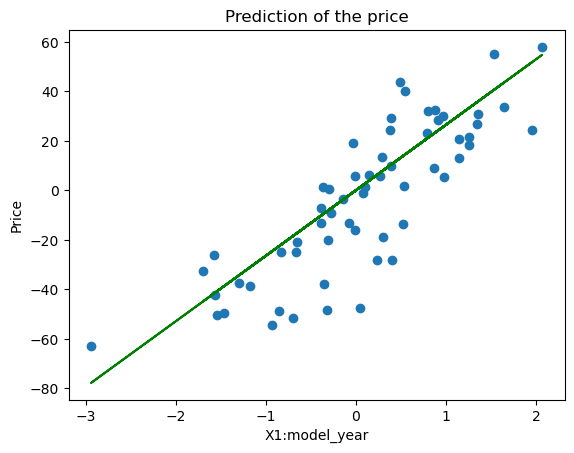

In [182]:
#Now we can predict
y_predict =model(X_test,θ_optim)
plt.scatter(X_test[:,0],y_test)
plt.plot(X_test[:,0],y_predict,c='green')
plt.title('Prediction of the price')
plt.xlabel('X1:model_year')
plt.ylabel('Price')

# Plot the fluctation of the loss 

Text(0, 0.5, 'Loss')

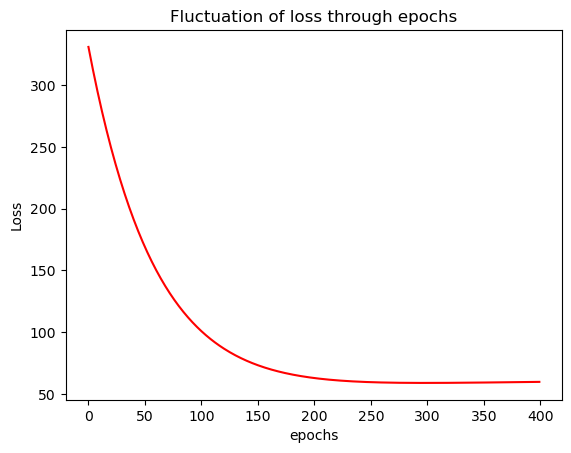

In [189]:
plt.plot(range(loss_history.shape[0]),loss_history,c='red')
plt.title('Fluctuation of loss through epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')